In [250]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [251]:
mydata = pd.read_csv('Sales.csv')

In [252]:
mydata.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [253]:
mydata=mydata.drop(['Purchase Address'], axis=1)

In [254]:
mydata.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30
3,176560,Google Phone,1,600,04/12/19 14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38


In [255]:
def get_missing_data(df):
    missing_data = df.isnull().sum().to_frame()
    missing_data.columns = ['count']
    missing_data['percent'] = missing_data['count']/df.shape[0]
    missing_data.sort_values(by = 'count', ascending = False, inplace = False)
    return missing_data

In [256]:
print(get_missing_data(mydata))

                  count   percent
Order ID             59  0.003209
Product              59  0.003209
Quantity Ordered     59  0.003209
Price Each           59  0.003209
Order Date           59  0.003209


In [257]:
mydata.dropna(axis = 0, inplace = True)
print(get_missing_data(mydata))

                  count  percent
Order ID              0      0.0
Product               0      0.0
Quantity Ordered      0      0.0
Price Each            0      0.0
Order Date            0      0.0


In [258]:
mydata.head()
mydata.dtypes
mydata.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date
count,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584
top,Order ID,Lightning Charging Cable,1,14.95,Order Date
freq,35,2201,16558,2201,35


In [259]:
Quantity_Ordered_str_idx = mydata.loc[~mydata['Quantity Ordered'].str.isdigit(),:].index
mydata.drop(Quantity_Ordered_str_idx, axis = 0, inplace = True)

In [260]:
mydata['Quantity Ordered'] = pd.to_numeric(mydata['Quantity Ordered']).astype('int8')
mydata['Price Each'] = pd.to_numeric(mydata['Price Each']).astype('float32')
mydata['Order Date'] = pd.to_datetime(mydata['Order Date'])

In [261]:
mydata[['Quantity Ordered', 'Price Each']].describe()

,Quantity Ordered,Price Each
count,18289.00000,18289.000000
mean,1.12461,184.439407
std,0.43641,330.902649
min,1.00000,2.990000
25%,1.00000,11.950000
50%,1.00000,14.950000
75%,1.00000,150.000000
max,7.00000,1700.000000


In [262]:
mydata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00


In [263]:
mydata['Revenue'] = mydata['Quantity Ordered'] * mydata['Price Each']

mydata['Year'] =  mydata['Order Date'].dt.year

mydata['Month'] = mydata['Order Date'].dt.month

mydata['day']  = mydata['Order Date'].dt.day

mydata['Hour'] = mydata['Order Date'].dt.hour

mydata['MonthName'] = mydata['Order Date'].dt.month_name()

In [264]:
mydata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Revenue,Year,Month,day,Hour,MonthName
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,23.900000,2019,4,19,8,April
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,99.989998,2019,4,7,22,April
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,600.000000,2019,4,12,14,April
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,11.990000,2019,4,12,14,April
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,11.990000,2019,4,30,9,April


In [265]:
mydata['MonthName'] = pd.Categorical(mydata['MonthName'], categories = ['January', 'February', 'March', 'April', 'May','June','July','August','September','October','November','December'], ordered = True)

In [266]:
month_count_revenue = mydata.groupby(by = 'MonthName').agg({'Quantity Ordered':'sum', 'Revenue':'sum'}).reset_index()
month_count_revenue.rename(columns = {'Quantity Ordered':'TotalQuan', 'Revenue':'TotalRevenue'}, inplace = True)

In [267]:
month_count_revenue.sort_values(by = 'MonthName', ascending  = True, inplace = True)

In [268]:
month_count_revenue['TotalQuanRate'] = month_count_revenue['TotalQuan']*100 / month_count_revenue['TotalQuan'].sum()
month_count_revenue['TotalRevenueRate'] = month_count_revenue['TotalRevenue']*100 / month_count_revenue['TotalRevenue'].sum()

In [269]:
month_count_revenue.describe()

,TotalQuan,TotalRevenue,TotalQuanRate,TotalRevenueRate
count,12.000000,1.200000e+01,12.000000,12.000000
mean,1714.000000,2.830049e+05,8.333333,8.333334
std,5928.343399,9.770370e+05,28.823140,28.769735
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000
max,20539.000000,3.385500e+06,99.859004,99.689079


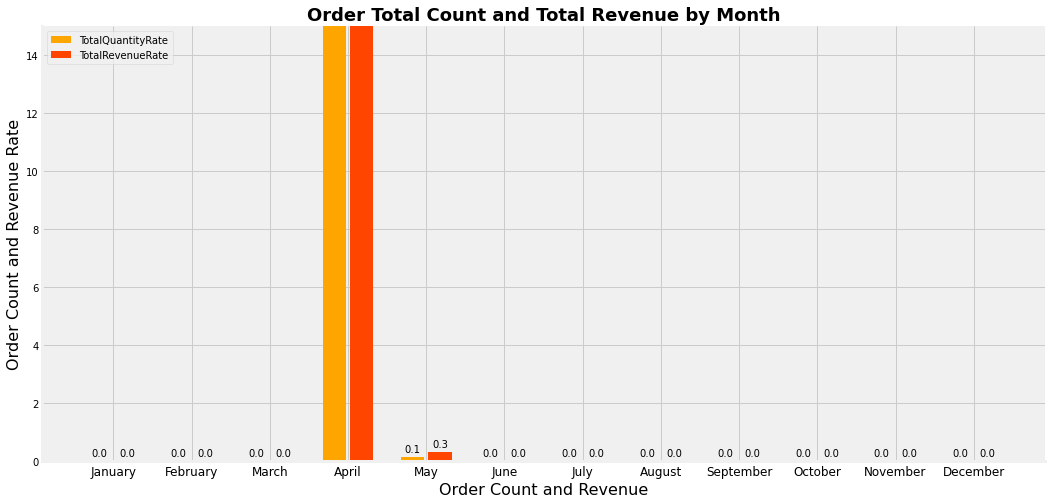

In [270]:
fig, ax = plt.subplots(figsize = (16,8))
width = 0.35
x = np.arange(month_count_revenue.shape[0])
rect1 = ax.bar(x = x-width/2 , height = month_count_revenue['TotalQuanRate'], width = 0.3, color = '#FFA500',label = 'TotalQuantityRate')
rect2 = ax.bar(x = x+width/2, height = month_count_revenue['TotalRevenueRate'], width = 0.3, color = '#FF4500', label = 'TotalRevenueRate')
ax.set_xticks(x)
ax.set_xticklabels(month_count_revenue['MonthName'], fontsize = 12)
ax.set_ylim(0,15)
ax.legend(loc = 'upper left')
ax.bar_label(rect1, padding = 3,fmt = '%.1f' )
ax.bar_label(rect2, padding = 3, fmt = '%.1f')
ax.set_xlabel('Order Count and Revenue', fontsize = 16)
ax.set_ylabel('Order Count and Revenue Rate', fontsize = 16)
ax.set_title('Order Total Count and Total Revenue by Month', fontsize = 18, weight = 'semibold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.show()

In [271]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

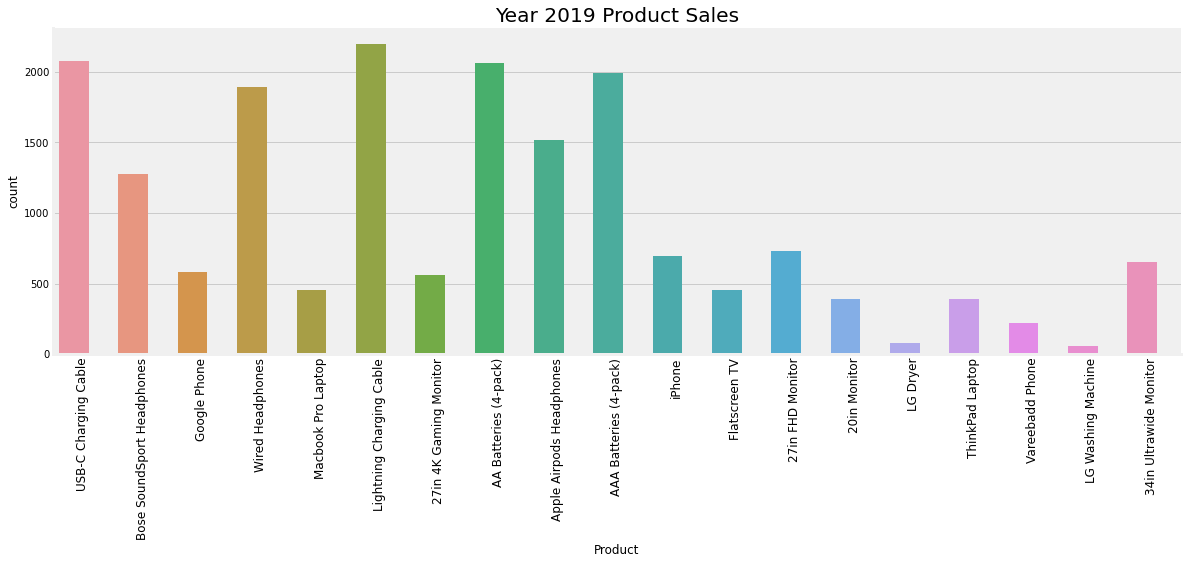

In [272]:

fig, ax = plt.subplots(figsize = (18,6))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'Product', data = mydata, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 12)
plt.setp(ax.patches, width = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.set_title('Year 2019 Product Sales')
plt.show()


In [273]:
mydata['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

<AxesSubplot:xlabel='Revenue', ylabel='Density'>

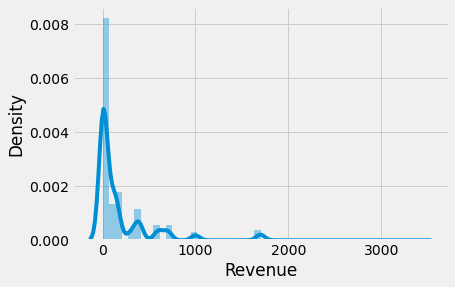

In [274]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(mydata['Revenue'])

In [277]:
AddrProducts.rename(columns = {'index':'AddrIdx'})

,level_0,AddrIdx,Addr,Products,ProductsLen
0,0,0,"1 14th St, New York City, NY 10001",[Bose SoundSport Headphones],1
1,1,1,"1 1st St, Austin, TX 73301",[Wired Headphones],1
2,2,2,"1 5th St, New York City, NY 10001",[AA Batteries (4-pack)],1
3,3,3,"1 6th St, Austin, TX 73301",[LG Dryer],1
4,4,4,"1 6th St, Los Angeles, CA 90001",[Bose SoundSport Headphones],1
...,...,...,...,...,...
17114,17114,17114,"999 Lake St, San Francisco, CA 94016",[USB-C Charging Cable],1
17115,17115,17115,"999 Madison St, Seattle, WA 98101",[34in Ultrawide Monitor],1
17116,17116,17116,"999 North St, Dallas, TX 75001",[Lightning Charging Cable],1
17117,17117,17117,"999 North St, Seattle, WA 98101",[AAA Batteries (4-pack)],1


In [278]:
AddrProducts['ProductsLen'] = AddrProducts['Products'].apply(lambda x:len(x))

In [279]:
AddrProductsG1 = AddrProducts.query('ProductsLen>1')

In [280]:
addrPro = AddrProductsG1['Products']
addrPro

6        [Apple Airpods Headphones, 27in 4K Gaming Moni...
7                     [Google Phone, USB-C Charging Cable]
11       [iPhone, Lightning Charging Cable, Wired Headp...
23                          [Flatscreen TV, Flatscreen TV]
37                      [iPhone, Apple Airpods Headphones]
                               ...                        
17073           [AAA Batteries (4-pack), 27in FHD Monitor]
17074        [AA Batteries (4-pack), USB-C Charging Cable]
17094                [USB-C Charging Cable, Flatscreen TV]
17099                   [iPhone, Lightning Charging Cable]
17101       [34in Ultrawide Monitor, USB-C Charging Cable]
Name: Products, Length: 1101, dtype: object

In [281]:
te = TransactionEncoder()
te.fit(addrPro)
te_ary = te.transform(addrPro)
te_df = pd.DataFrame(te_ary, columns=te.columns_)

In [282]:
def get_frequent_items(te_df, min_support = 0.02):
    frequent_items = apriori(te_df, min_support=min_support, use_colnames=True)
    frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
    return frequent_items.query('length>1')

In [283]:
get_frequent_items(te_df, min_support = 0.03)

,support,itemsets,length
17,0.036331,"(iPhone, Apple Airpods Headphones)",2
18,0.099001,"(USB-C Charging Cable, Google Phone)",2
19,0.041780,"(Wired Headphones, Google Phone)",2
20,0.099001,"(iPhone, Lightning Charging Cable)",2
21,0.035422,"(Vareebadd Phone, USB-C Charging Cable)",2
22,0.041780,"(Wired Headphones, iPhone)",2


In [284]:
te.fit(AddrProducts['Products'])
te_full_array = te.transform(AddrProducts['Products'])
te_full_df = pd.DataFrame(te_full_array, columns=te.columns_)

In [285]:
productPercent = te_full_df.sum(axis = 0)/te_full_df.sum(axis = 0).sum()

In [286]:
D = {}
D =productPercent.sort_values(ascending = False)
print(D)

Lightning Charging Cable      0.119897
USB-C Charging Cable          0.113641
AA Batteries (4-pack)         0.112709
AAA Batteries (4-pack)        0.108593
Wired Headphones              0.103490
Apple Airpods Headphones      0.082803
Bose SoundSport Headphones    0.069963
27in FHD Monitor              0.040277
iPhone                        0.038027
34in Ultrawide Monitor        0.035558
Google Phone                  0.031771
27in 4K Gaming Monitor        0.030893
Flatscreen TV                 0.025022
Macbook Pro Laptop            0.024857
ThinkPad Laptop               0.021510
20in Monitor                  0.021345
Vareebadd Phone               0.012072
LG Dryer                      0.004225
LG Washing Machine            0.003347
dtype: float64


In [287]:
print(D.keys())

Index(['Lightning Charging Cable', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Wired Headphones',
       'Apple Airpods Headphones', 'Bose SoundSport Headphones',
       '27in FHD Monitor', 'iPhone', '34in Ultrawide Monitor', 'Google Phone',
       '27in 4K Gaming Monitor', 'Flatscreen TV', 'Macbook Pro Laptop',
       'ThinkPad Laptop', '20in Monitor', 'Vareebadd Phone', 'LG Dryer',
       'LG Washing Machine'],
      dtype='object')


In [288]:
old_profit=int(input("Old Profit %"))
new_profit=int(input("New Profit %"))
temp_products = D.keys()
for i in temp_products:
    price = D_new[i]
    D_new[i]=price*(100+new_profit)/(100+old_profit)

Old Profit %10
New Profit %5


In [289]:
D_new=dict(zip(mydata['Product'], mydata['Price Each']))

In [300]:
template=template = "{0:30} {1:1}"

for i in D_new.keys():
    print(template.format(i, D_new[i]))

USB-C Charging Cable           11.949999809265137
Bose SoundSport Headphones     99.98999786376953
Google Phone                   600.0
Wired Headphones               11.989999771118164
Macbook Pro Laptop             1700.0
Lightning Charging Cable       14.949999809265137
27in 4K Gaming Monitor         389.989990234375
AA Batteries (4-pack)          3.8399999141693115
Apple Airpods Headphones       150.0
AAA Batteries (4-pack)         2.990000009536743
iPhone                         700.0
Flatscreen TV                  300.0
27in FHD Monitor               149.99000549316406
20in Monitor                   109.98999786376953
LG Dryer                       600.0
ThinkPad Laptop                999.989990234375
Vareebadd Phone                400.0
LG Washing Machine             600.0
34in Ultrawide Monitor         379.989990234375
